## Importing Libiraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
concrete_data=pd.read_csv("concrete_data.csv")
concrete_data.head()
mean_squared_error_list=[]


## Data preprocessing 
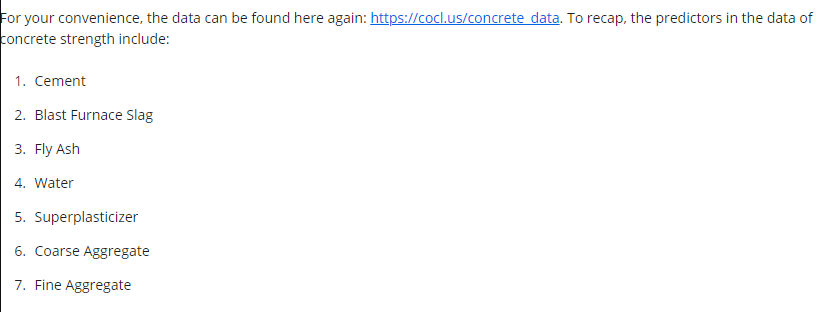

It means that the age col has to be dropped 

In [3]:
concrete_data.drop(columns='Age',inplace=True)

In [4]:
concrete_data.head()
normalized_df=(concrete_data-concrete_data.mean())/concrete_data.std()

In [5]:
predictors_cols=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate']
target_col='Strength'
Xx=normalized_df[predictors_cols]
y=normalized_df[target_col]
print("the predictors are",X)
print("the target column is",y)

the predictors are         Cement  Blast Furnace Slag  ...  Coarse Aggregate  Fine Aggregate
0     2.476712           -0.856472  ...          0.862735       -1.217079
1     2.476712           -0.856472  ...          1.055651       -1.217079
2     0.491187            0.795140  ...         -0.526262       -2.239829
3     0.491187            0.795140  ...         -0.526262       -2.239829
4    -0.790075            0.678079  ...          0.070492        0.647569
...        ...                 ...  ...               ...             ...
1025 -0.045623            0.487998  ...         -1.322363       -0.065861
1026  0.392628           -0.856472  ...         -1.993711        0.496651
1027 -1.269472            0.759210  ...         -1.035561        0.080068
1028 -1.168042            1.307430  ...          0.214537        0.191074
1029 -0.193939            0.308349  ...         -1.394385       -0.150675

[1030 rows x 7 columns]
the target column is 0       2.644123
1       1.560663
2       0.266

## Model B

In [6]:
model=Sequential()

In [8]:
input_cols=X.shape[1]
input_cols

7

In [9]:
model.add(Dense(10,activation='relu',input_shape=(input_cols,)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [10]:
for i in range(50):
  #1.Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  model.fit(X_train,y_train,epochs=50)
  y_pred=model.predict(X_test)
  mean_error=mean_squared_error(y_test, y_pred)
  mean_squared_error_list.append(mean_error)


Streaming output truncated to the last 5000 lines.
Epoch 1/50
23/23 [==============================] - 13s 1ms/step - loss: 1.2961
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 1.0443
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 1.0387
Epoch 4/50
23/23 [==============================] - 0s 1ms/step - loss: 0.8706
Epoch 5/50
23/23 [==============================] - 0s 1ms/step - loss: 0.8279
Epoch 6/50
23/23 [==============================] - 0s 1ms/step - loss: 0.8495
Epoch 7/50
23/23 [==============================] - 0s 1ms/step - loss: 0.7668
Epoch 8/50
23/23 [==============================] - 0s 1ms/step - loss: 0.7448
Epoch 9/50
23/23 [==============================] - 0s 1ms/step - loss: 0.6787
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6452
Epoch 11/50
23/23 [==============================] - 0s 1ms/step - loss: 0.5733
Epoch 12/50
23/23 [==============================] - 0s 1ms/step - loss: 0.65

In [11]:
# converting the list to a numpy array 
array=np.array(mean_squared_error_list)


In [12]:
#calculating the mean 
#mean of model A 168.02053067523804
array.mean()

0.5428556934135055

In [13]:
#calculating the standard deviation 
#std of model A 22.780777295260616
array.std()

0.01035873210196119

In conclusion, the mean Squared error and the standard deviation due to the normalizarion have signficantly decreased.  